In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from wrangle import wrangle_zillow



import warnings
warnings.filterwarnings("ignore")

In [3]:
train, validate, test = wrangle_zillow()

In [4]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,fips
10057,4.0,2.0,1561.0,248240.0,1973,6059
2004970,3.0,2.0,1770.0,88390.0,1960,6037
306031,2.0,1.0,1452.0,81169.0,1946,6037
1038595,3.0,1.0,1000.0,119174.0,1950,6037
270959,3.0,2.0,1974.0,432268.0,1988,6037


# Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
features = ['bedrooms', 'bathrooms', 'area', 'tax_value']

In [6]:
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

In [7]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

MinMaxScaler()

In [8]:
X_train_scaled = scaler.transform(X_train)

Text(0.5, 1.0, 'Scaled')

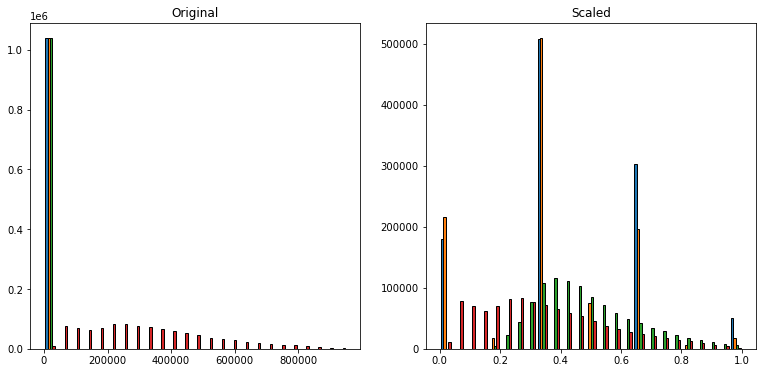

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

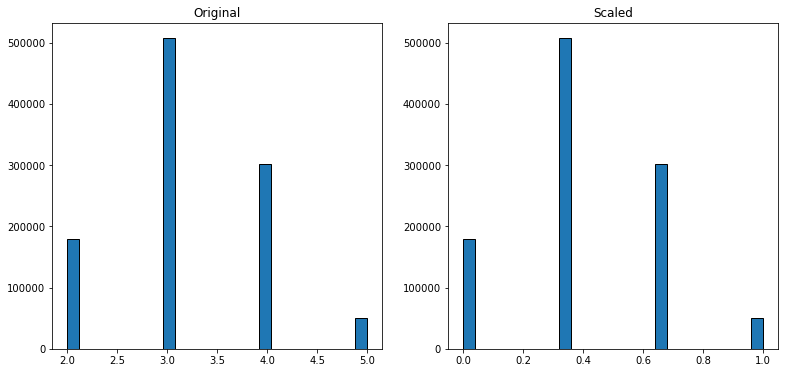

In [10]:
features = ['bedrooms']
X_train = train[features]
X_validate = validate[features]
X_test = test[features]
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

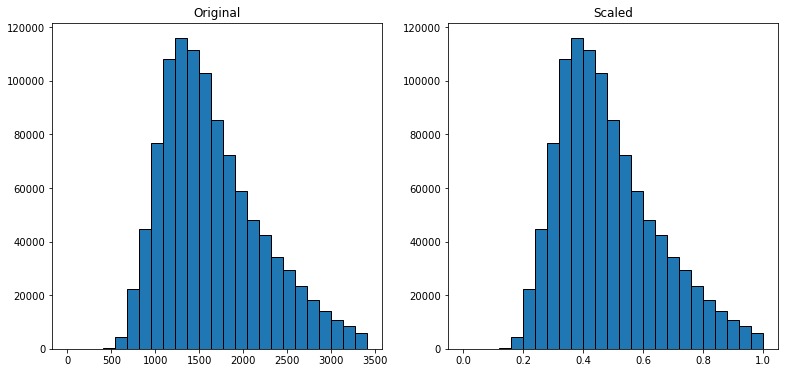

In [11]:
features = ['area']
X_train = train[features]
X_validate = validate[features]
X_test = test[features]
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [12]:
X_train['area'], scaler.inverse_transform(X_train_scaled)

(10057      1561.0
 2004970    1770.0
 306031     1452.0
 1038595    1000.0
 270959     1974.0
             ...  
 991122     1199.0
 1707759    1859.0
 1770246    2132.0
 1500741     780.0
 843328     1132.0
 Name: area, Length: 1038959, dtype: float64,
 array([[1561.],
        [1770.],
        [1452.],
        ...,
        [2132.],
        [ 780.],
        [1132.]]))

# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [13]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal',random_state=0)
scaler.fit_transform(X_train)

array([[ 0.02634899],
       [ 0.3723028 ],
       [-0.17782698],
       ...,
       [ 0.85770075],
       [-2.14401067],
       [-0.93974701]])

Text(0.5, 1.0, 'Scaled')

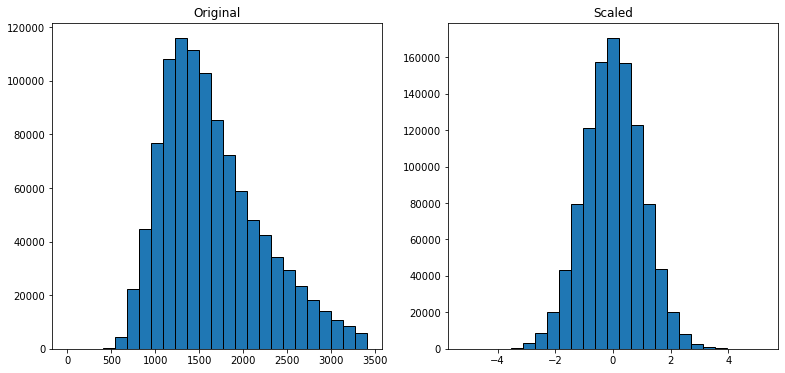

In [14]:
X_train_scaled = scaler.transform(X_train)
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'Scaled')

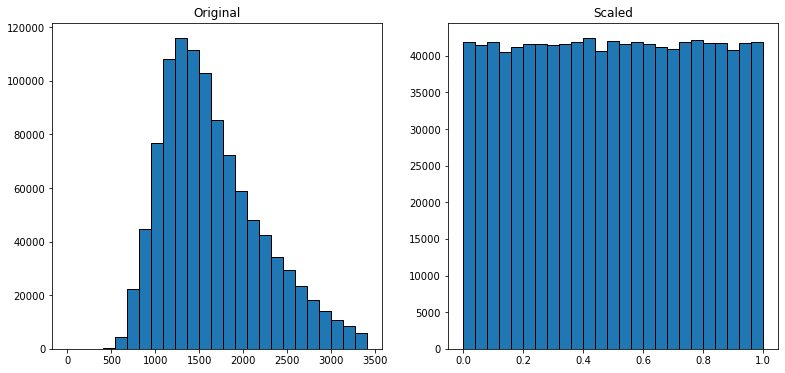

In [15]:
scaler = sklearn.preprocessing.QuantileTransformer(random_state=0)
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [23]:
def scale_min_max(train, validate, test, features):

    X_train = train[features]
    X_validate = validate[features]
    X_test = test[features]
    
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [18]:
train, validate, test = wrangle_zillow()

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  object 
 5   fips        1038959 non-null  object 
dtypes: float64(4), object(2)
memory usage: 87.7+ MB


In [20]:
features = ['bedrooms', 'bathrooms', 'area', 'tax_value']

In [21]:
train_scaled, validate_scaled, test_scaled = scale_min_max(train, validate, test, features)

# I liked Ravinder function a lot better

In [ ]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test